# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [112]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

    Answer: total of 400 observations

#### Question 2. Create a summary table

In [7]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE is evaluating a larger set of values than GPA, thus it has a larger range of values

#### Question 4. Drop data points with missing data


In [87]:
dn = df_raw.copy()
null_data = df_raw[df_raw.isnull().any(axis=1)]
print null_data

dn.dropna(axis=0, inplace=True)
null_data = dn[dn.isnull().any(axis=1)]
print null_data
dn.isnull().sum()
dn.describe()

     admit    gre   gpa  prestige
187      0    NaN   NaN       2.0
212      0    NaN  2.87       2.0
236      1  660.0   NaN       NaN
Empty DataFrame
Columns: [admit, gre, gpa, prestige]
Index: []


,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: checked isnull values, and there are none.

#### Question 6. Create box plots for GRE and GPA

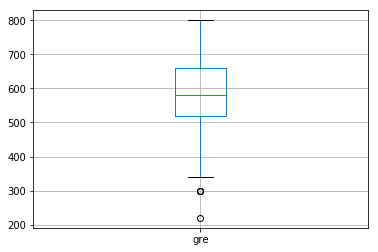

In [94]:
dn.boxplot(column=['gre'])

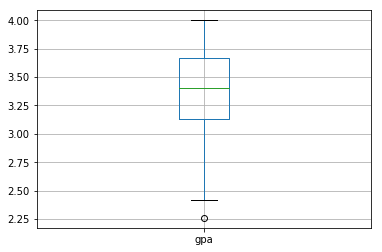

In [93]:
dn.boxplot(column=['gpa'])

#### Question 7. What do this plots show?

Answer: The plots show the data distribution, and outliers 

#### Question 8. Describe each distribution 

Answer: 
gre: The normal distribution is between ~340 to 800, with the mean of ~580. the values of 300 and below are outliers
gpa: The normal distribution is between ~3.4 to 4.0, with the mean of ~3.45. The values of 2.25 is an outlier.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, we would meet the aasumption once we drop the outliers.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We need to remove the outliers

#### Question 11. Which of our variables are potentially colinear? 

In [115]:
# create a correlation matrix for the data
correlations = dn[['gpa', 'gre', 'prestige']].corr()
print correlations
#print sns.heatmap(correlations, cmap=cmap)
# plt.figure()
# # generate a scatterplot inside the figure
# plt.plot(dn.gpa, dn.gre, '.')
# # show the plot
# plt.show()

#sns.lmplot('gpa', 'gre', dn)

               gpa       gre  prestige
gpa       1.000000  0.382408 -0.060976
gre       0.382408  1.000000 -0.124533
prestige -0.060976 -0.124533  1.000000


#### Question 12. What did you find?

Answer: no there isn't a relation b/c correlation is not above 70%

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer:  I'll will use seaborn factorplotgraphing tool to check if there is an association between grad school admissions rates

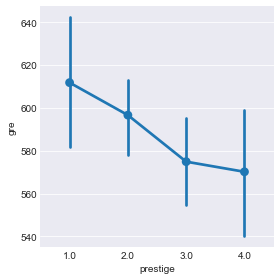

In [145]:
print sns.factorplot(x="prestige", y="gre", data=dn)
#print sns.stripplot(x="prestige", y="gre", data=dn);

#### Question 14. What is your hypothesis? 

Answer: There is relationship between low prestige and high gre.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

dn.dropna(axis=0, inplace=True)

In [137]:
table = df_raw.copy()
table.drop(table.index[187], inplace=True)

#### 2. Bonus: Log transform the skewed data

In [146]:
log_columns = ['gre', 'gpa',]
log_dn = dn.copy()
log_dn[log_columns] = log_dn[log_columns].apply(np.log10)
log_dn

,admit,gre,gpa,prestige
0,0,2.579784,0.557507,3.0
1,1,2.819544,0.564666,3.0
2,1,2.903090,0.602060,1.0
3,1,2.806180,0.503791,4.0
4,0,2.716003,0.466868,4.0
5,1,2.880814,0.477121,2.0
6,1,2.748188,0.474216,1.0
7,0,2.602060,0.488551,2.0
8,1,2.732394,0.530200,3.0
9,0,2.845098,0.593286,2.0


#### 3. Advanced: Impute missing data